### This file is for:
- Data Exploration
- Data Cleansing 
- Data Visualization 
- Gain insights and building the pipline

### needed packages

In [89]:
# utilities 
# needed pacakges for running the model 
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import os
import json
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
import joblib
from joblib import dump
from sklearn.ensemble import RandomForestClassifier


## Handling data for the model

In [2]:
# reading Data
data_df = pd.read_csv("usgs_data.csv",index_col=False)
pd.set_option('display.max_columns', None)
data_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2010-11-09T11:24:23.880Z,26.032,141.935,10.0,4.1,mb,9.0,161.6,NaN,0.86,us,usp000hpap,2014-11-07T01:42:53.405Z,"Bonin Islands, Japan region",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
1,2010-11-09T16:18:24.100Z,32.980,136.413,435.0,4.3,mb,13.0,155.2,NaN,0.55,us,usp000hpb2,2014-11-07T01:42:53.475Z,"92 km SSE of Shing?, Japan",earthquake,NaN,6.9,NaN,7.0,reviewed,us,us
2,2010-11-11T23:10:45.400Z,42.867,145.389,67.8,4.1,mwr,29.0,93.9,NaN,0.80,us,usp000hped,2014-11-07T01:42:54.013Z,"52 km SSW of Nemuro, Japan",earthquake,NaN,9.6,NaN,NaN,reviewed,us,nied
3,2010-11-12T04:27:18.410Z,29.979,142.867,35.0,4.0,mwr,55.0,58.9,NaN,0.91,us,usp000hpen,2014-11-07T01:42:54.066Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,nied
4,2010-11-14T06:10:29.350Z,34.036,141.373,26.8,5.0,mwc,130.0,110.4,NaN,1.09,us,usp000hphy,2016-11-10T02:36:03.996Z,"156 km SE of Katsuura, Japan",earthquake,NaN,14.6,NaN,NaN,reviewed,us,gcmt


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18407 entries, 0 to 18406
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18407 non-null  object 
 1   latitude         18407 non-null  float64
 2   longitude        18407 non-null  float64
 3   depth            18407 non-null  float64
 4   mag              18407 non-null  float64
 5   magType          18407 non-null  object 
 6   nst              9888 non-null   float64
 7   gap              18404 non-null  float64
 8   dmin             10323 non-null  float64
 9   rms              18407 non-null  float64
 10  net              18407 non-null  object 
 11  id               18407 non-null  object 
 12  updated          18407 non-null  object 
 13  place            18215 non-null  object 
 14  type             18407 non-null  object 
 15  horizontalError  9157 non-null   float64
 16  depthError       15300 non-null  float64
 17  magError    

In [4]:
data_df['place'].value_counts().unique()

array([1878, 1632,  290,  207,  136,   52,   34,   20,   18,   17,   14,
         12,   11,   10,    9,    8,    7,    6,    5,    4,    3,    2,
          1])

In [5]:
data_df['status'].value_counts()

status
reviewed    18407
Name: count, dtype: int64

In [6]:
data_df['magSource'].value_counts()

magSource
us          17877
gcmt          413
nied          116
official        1
Name: count, dtype: int64

In [7]:
data_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,18407.000000,18407.000000,18407.000000,18407.000000,9888.000000,18404.000000,10323.000000,18407.00000,9157.00000,15300.000000,10165.000000,17097.000000
mean,35.215285,140.858074,60.132726,4.562541,78.623078,111.959493,1.951676,0.81551,7.44083,7.040844,0.121591,39.134527
std,4.926419,4.130205,95.151940,0.386556,94.253050,38.590442,1.254057,0.23525,2.35308,5.375419,0.069928,63.211425
min,24.876200,126.746800,0.000000,2.700000,6.000000,8.000000,0.038000,0.04000,1.40000,0.000000,0.019000,1.000000
25%,31.137550,140.558750,11.000000,4.300000,25.000000,87.000000,1.087000,0.66000,5.90000,3.500000,0.070000,7.000000
50%,36.535000,141.953900,35.000000,4.500000,42.000000,119.100000,1.806000,0.80000,7.23000,6.100000,0.107000,16.000000
75%,38.290050,143.214700,52.984000,4.700000,88.000000,135.400000,2.618000,0.96000,8.70000,8.600000,0.157000,41.000000
max,48.111200,147.653200,686.390000,9.100000,918.000000,306.000000,33.409000,1.94000,21.70000,62.800000,0.558000,941.000000


In [8]:
data_df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8519
gap                   3
dmin               8084
rms                   0
net                   0
id                    0
updated               0
place               192
type                  0
horizontalError    9250
depthError         3107
magError           8242
magNst             1310
status                0
locationSource        0
magSource             0
dtype: int64

Data visualizaiton

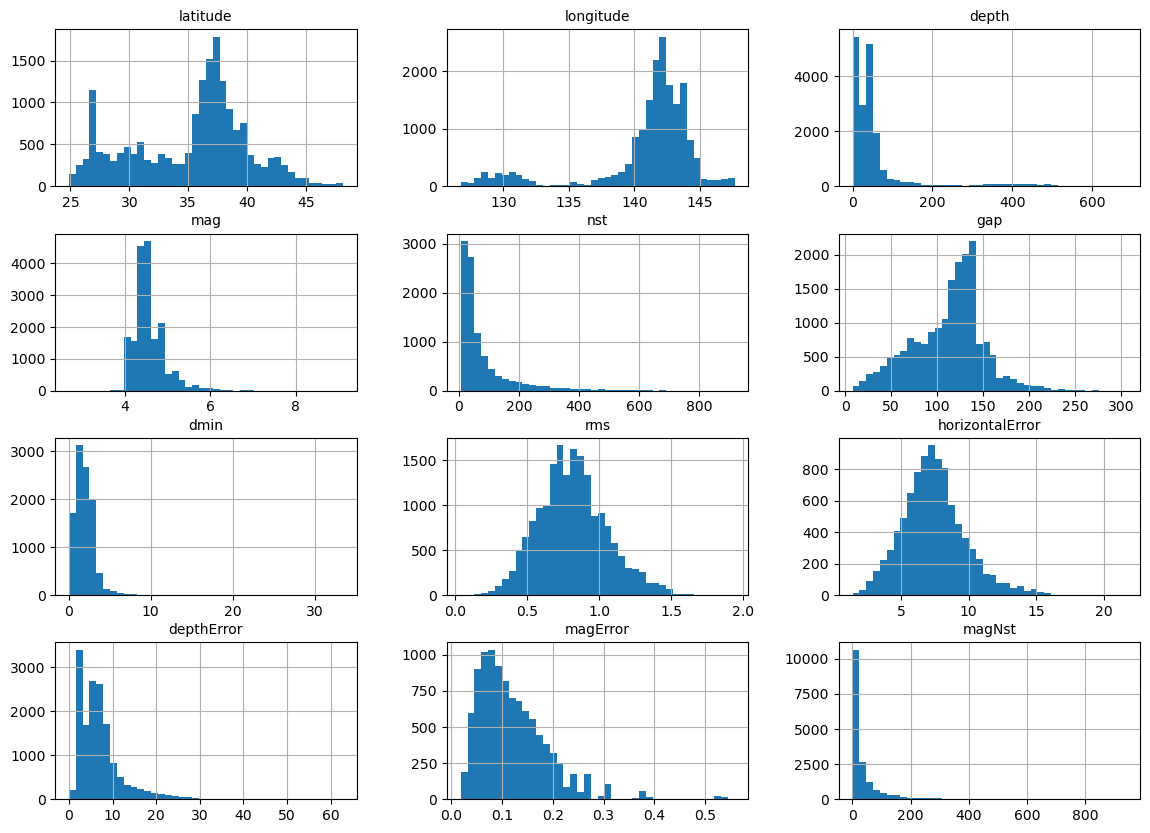

In [9]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data_df.drop(columns=[]).hist(bins=40, figsize=(14, 10))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [10]:
data_df.gap.describe()

count    18404.000000
mean       111.959493
std         38.590442
min          8.000000
25%         87.000000
50%        119.100000
75%        135.400000
max        306.000000
Name: gap, dtype: float64

In [11]:
# actions to be taken - output of the EDA process
#================
# delete the rms larger than  1
# check outlier in the depth 
# check outlier in the mag 
# check outlier in the nst
#================
# columns to drop
# place drop - gap drop 
# ==============
# imputation : 
# by mean ==
# magError - mean
# depthError : mean
# horizontalError : mean
# ===== 
# by median ==
# nst and magNst : median
# dmin : median
# ==============

### Data Cleansing 

In [12]:
data_df2 = data_df.drop(columns=["id","net","locationSource","status","updated","type","time","place"])
data_df2.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'magSource'],
      dtype='object')

In [13]:
data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18407 entries, 0 to 18406
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         18407 non-null  float64
 1   longitude        18407 non-null  float64
 2   depth            18407 non-null  float64
 3   mag              18407 non-null  float64
 4   magType          18407 non-null  object 
 5   nst              9888 non-null   float64
 6   gap              18404 non-null  float64
 7   dmin             10323 non-null  float64
 8   rms              18407 non-null  float64
 9   horizontalError  9157 non-null   float64
 10  depthError       15300 non-null  float64
 11  magError         10165 non-null  float64
 12  magNst           17097 non-null  float64
 13  magSource        18407 non-null  object 
dtypes: float64(12), object(2)
memory usage: 2.0+ MB


In [14]:
df = data_df2

In [15]:
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,magSource
0,26.032,141.935,10.0,4.1,mb,9.0,161.6,NaN,0.86,NaN,NaN,NaN,2.0,us
1,32.980,136.413,435.0,4.3,mb,13.0,155.2,NaN,0.55,NaN,6.9,NaN,7.0,us
2,42.867,145.389,67.8,4.1,mwr,29.0,93.9,NaN,0.80,NaN,9.6,NaN,NaN,nied
3,29.979,142.867,35.0,4.0,mwr,55.0,58.9,NaN,0.91,NaN,NaN,NaN,NaN,nied
4,34.036,141.373,26.8,5.0,mwc,130.0,110.4,NaN,1.09,NaN,14.6,NaN,NaN,gcmt


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18407 entries, 0 to 18406
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         18407 non-null  float64
 1   longitude        18407 non-null  float64
 2   depth            18407 non-null  float64
 3   mag              18407 non-null  float64
 4   magType          18407 non-null  object 
 5   nst              9888 non-null   float64
 6   gap              18404 non-null  float64
 7   dmin             10323 non-null  float64
 8   rms              18407 non-null  float64
 9   horizontalError  9157 non-null   float64
 10  depthError       15300 non-null  float64
 11  magError         10165 non-null  float64
 12  magNst           17097 non-null  float64
 13  magSource        18407 non-null  object 
dtypes: float64(12), object(2)
memory usage: 2.0+ MB


### Data processing and Pipeline

dealing with the skeweed data 

In [ ]:
# class handle_skewed_to_log(BaseEstimator,TransformerMixin):
#     def fit(self,x, y =None):
#         return self 
#     def transform(self,X):
#         return np.log(X)
# class handle_range (BaseEstimator,TransformerMixin):
#     def fit(self,x, y=None):
#         return self
#     def transform(self,X):
#         #masking values more than one and setting it to one 
#         return X[X['rms']>=1] == 1 


In [24]:
# handling the nan values 
df.isna().sum()

latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8519
gap                   3
dmin               8084
rms                   0
horizontalError    9250
depthError         3107
magError           8242
magNst             1310
magSource             0
dtype: int64

In [26]:
# small nan values in gap -- drop them
df_g = df.dropna(subset=['gap'])

In [28]:
df_g.shape

(18404, 14)

In [29]:
df.shape

(18407, 14)

In [32]:
df_g.isna().sum()

latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8517
gap                   0
dmin               8081
rms                   0
horizontalError    9249
depthError         3107
magError           8241
magNst             1309
magSource             0
dtype: int64

In [33]:
#ready to impute using the pipline and output a clean dataframe
#apply value transformation on the data and handle the skewed data 
# there is also another approach that is the dummy model have good results on the given data without applying the transformation

In [56]:
# Custom transformer for removing outliers in "rms"
# if it work we will use another one to take the log for some data columns
# class RemoveRMSOutliers(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X[X['rms'] <= 1]


# Create a pipeline with the custom transformer and other transformers
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('impute_mean', SimpleImputer(strategy='mean'), ['magError', 'horizontalError', 'depthError']),
            ('impute_median', SimpleImputer(strategy='median'), ['nst', 'magNst']),
            ('impute_constant',SimpleImputer(strategy="constant", fill_value=0),['dmin']),
            ('one_hot_encode', OneHotEncoder(handle_unknown='ignore'), ['magSource', 'magType'])
        ],
        remainder='passthrough'
    ))
])
prepared_frame = pipeline.fit_transform(df_g)
# Get the column names after transformation
transformed_columns = (
    pipeline.named_steps['preprocessor']
    .get_feature_names_out(input_features=df_g.columns)
)

# Convert the transformed data to a DataFrame
df_g_transformed = pd.DataFrame(prepared_frame, columns=transformed_columns)


In [57]:
# Extract features (X) and target variable (y)
X = df_g_transformed.drop(columns=['remainder__mag'])  # Features
y = df_g_transformed['remainder__mag']  # Target variable

In [64]:
X.head()

,impute_mean__magError,impute_mean__horizontalError,impute_mean__depthError,impute_median__nst,impute_median__magNst,impute_constant__dmin,one_hot_encode__magSource_gcmt,one_hot_encode__magSource_nied,one_hot_encode__magSource_official,one_hot_encode__magSource_us,one_hot_encode__magType_mb,one_hot_encode__magType_mb_lg,one_hot_encode__magType_ml,one_hot_encode__magType_ms,one_hot_encode__magType_mwb,one_hot_encode__magType_mwc,one_hot_encode__magType_mwr,one_hot_encode__magType_mww,remainder__latitude,remainder__longitude,remainder__depth,remainder__gap,remainder__rms
0,0.121595,7.44085,7.04129,9.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.032,141.935,10.0,161.6,0.86
1,0.121595,7.44085,6.90000,13.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.980,136.413,435.0,155.2,0.55
2,0.121595,7.44085,9.60000,29.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.867,145.389,67.8,93.9,0.80
3,0.121595,7.44085,7.04129,55.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.979,142.867,35.0,58.9,0.91
4,0.121595,7.44085,14.60000,130.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.036,141.373,26.8,110.4,1.09


In [67]:
df_g.shape

(18404, 14)

In [66]:
print(f"the shape of X is {X.shape}")
print(f"the shape of y is {y.shape}")

the shape of X is (18404, 23)
the shape of y is (18404,)


In [65]:
nan_values_after_pipe = np.sum(np.isnan(prepared_frame))
print("nan values after pipe: "+str(nan_values_after_pipe))

nan values after pipe: 0


In [68]:
reg = VotingRegressor([
    ("forest", RandomForestRegressor(random_state = 42, n_estimators = 145)),
    ("extra", ExtraTreesRegressor(random_state = 42, n_estimators = 140)),
])

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
tree_model = reg.fit(X_train, y_train)

In [72]:
#prediction
train_pred = tree_model.predict(X_train)

In [73]:
print("The follwing is model performance on the training data")
print("\nfirst one is the MAE\nsecond is MSE \nthird is RMSE")
print(mae(y_train, train_pred))
print(mse(y_train, train_pred))
print(np.sqrt(mse(y_train, train_pred)))

The follwing is model performance on the training data

first one is the MAE
second is MSE 
third is RMSE
0.025899612850641886
0.0013471998118565855
0.03670422062728734


In [74]:
#testing accuracy metric
from sklearn.metrics import r2_score
# Calculate R^2 score
r2 = r2_score(y_train, train_pred)
print(f"r2 score is {r2}")


r2 score is 0.9909718299743652


In [75]:
# testing the result on the test set 
test_pred = tree_model.predict(X_test)

In [76]:
r2 = r2_score(y_test, test_pred)
print(f"r2 score is {r2}")

r2 score is 0.7476838577313727


In [77]:
print(mse(y_test, test_pred))
print(np.sqrt(mse(y_test, test_pred)))

0.03786294250171845
0.19458402427156873


In [80]:
#better understanding the model input -- arrangement is important 
X.head(1)


,impute_mean__magError,impute_mean__horizontalError,impute_mean__depthError,impute_median__nst,impute_median__magNst,impute_constant__dmin,one_hot_encode__magSource_gcmt,one_hot_encode__magSource_nied,one_hot_encode__magSource_official,one_hot_encode__magSource_us,one_hot_encode__magType_mb,one_hot_encode__magType_mb_lg,one_hot_encode__magType_ml,one_hot_encode__magType_ms,one_hot_encode__magType_mwb,one_hot_encode__magType_mwc,one_hot_encode__magType_mwr,one_hot_encode__magType_mww,remainder__latitude,remainder__longitude,remainder__depth,remainder__gap,remainder__rms
0,0.121595,7.44085,7.04129,9.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.032,141.935,10.0,161.6,0.86


In [81]:
#decided user input to the model 
X.iloc[:3,22]

0    0.86
1    0.55
2    0.80
Name: remainder__rms, dtype: float64

## Saving the model and data conversion to json 

Train the model on whole dataset for better performance

In [88]:
# Function to train the model
def train_model(X, y):

    # Train a linear regression model
    model = tree_model
    model.fit(X, y)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Save the trained model to a file
    joblib.dump(model, 'tree_model.joblib')

    print('Model trained and saved successfully.')
train_model(X,y)

Mean Squared Error: 0.0013184572511541182
Model trained and saved successfully.


## Feature Importance 

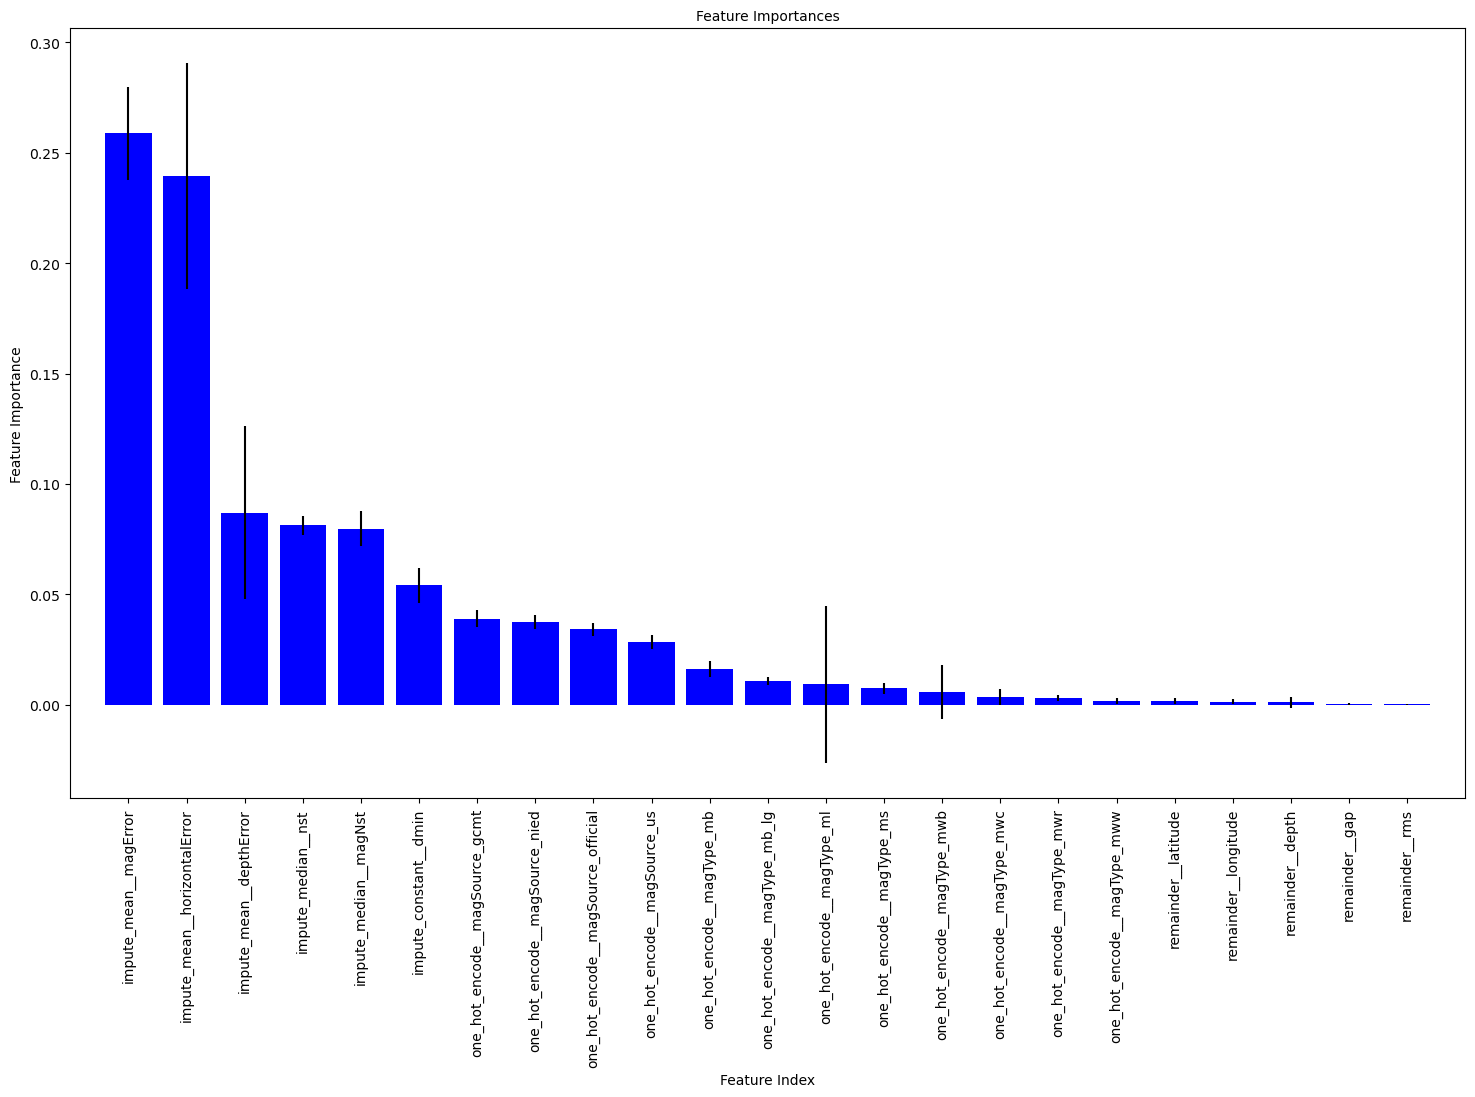

In [101]:
# Create a RandomForestRegressor
clf_rf = RandomForestRegressor()
clr_rf = clf_rf.fit(X, y)

# Get feature importances
importances = clr_rf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],axis=0)
# Plot the feature importances
plt.figure(figsize=(18, 10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices],align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.xlim([-1, X.shape[1]])
plt.show()

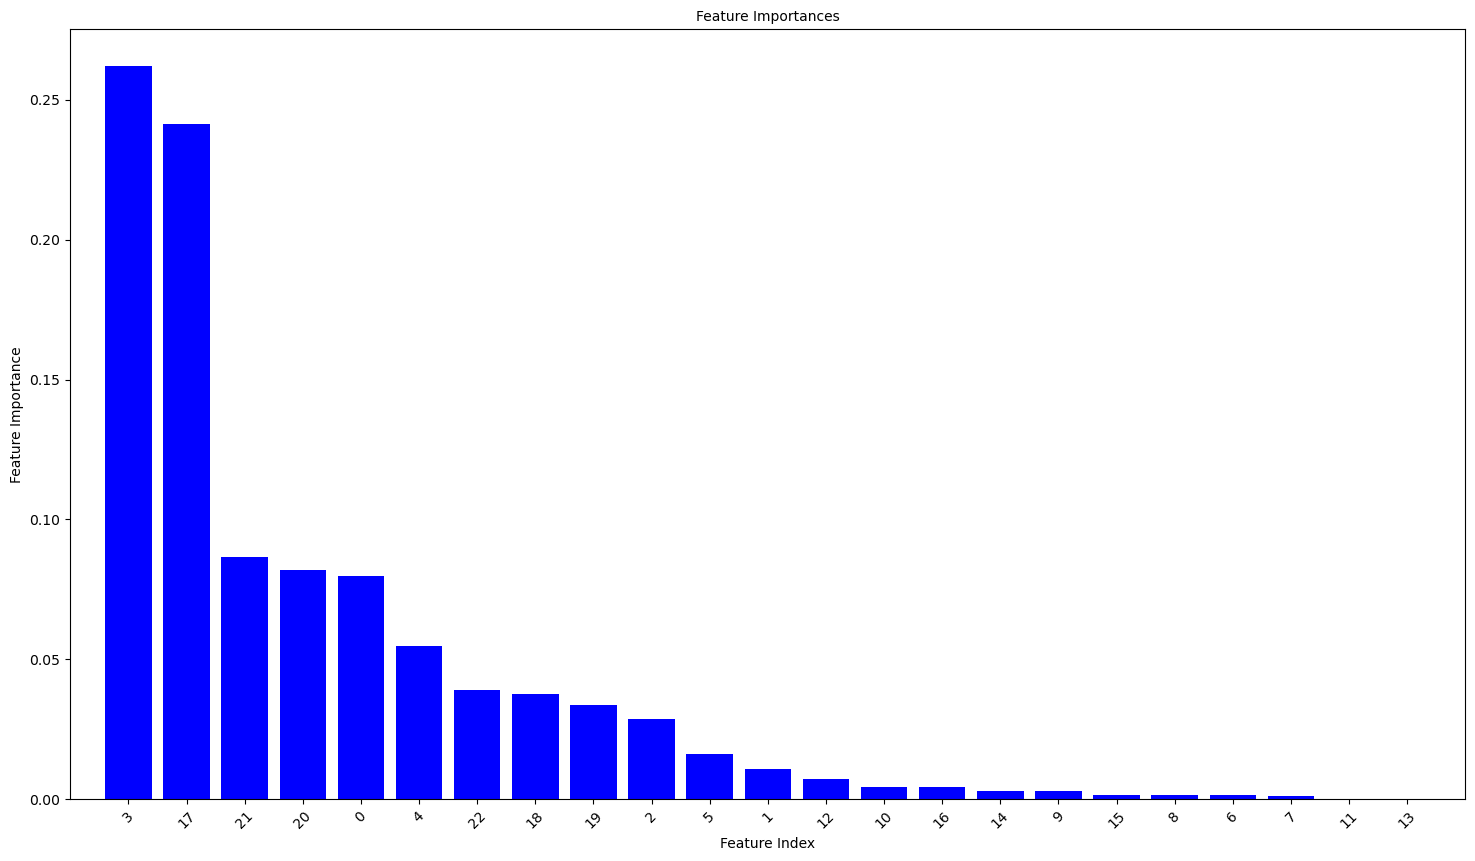

In [99]:
# Create a RandomForestRegressor
clf_rf = RandomForestRegressor()
clr_rf = clf_rf.fit(X, y)

# Get feature importances
importances = clr_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(18, 10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), indices, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.xlim([-1, X.shape[1]])
plt.show()

curl -X POST http://localhost:8000/predict -H "Content-Type: application/json" -d '{"magError": 1, "horizontalError": 2, "depthError": 3, "nst": 4,
 "magNst": 5, "dmin": 6, "gcmt": 7, "nied": 8,
  "official": 9, "us": 10, "mb": 11, "mb_lg": 12, 
  "ml": 13, "ms": 14, "mwb": 15, "mwc": 16,
   "mwr": 17, "mww": 18, "lat": 19, "lon": 20, 
   "depth": 21, "gap": 22, "rms": 23}'


In [ ]:
# you can use postman for testing your request ans model respone 
# the flutter app part in requesting from the model form wezza
# code in whats app 
# 